In [2]:
import os
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset_path = "data/synth_1000/train"

In [4]:
file_names = glob.glob(f"{dataset_path}/episode_*.npy")
assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"

data = []
for file in tqdm(file_names):
    data.append(np.load(file, allow_pickle=True))

 11%|█         | 111/1000 [00:02<00:19, 46.78it/s]


KeyboardInterrupt: 

In [80]:
ee_pose = np.concatenate([[np.stack(d["lowdim_ee"]) for d in sample] for sample in data])
actions = np.concatenate([[np.stack(d["action"]) for d in sample] for sample in data])

In [81]:
import numpy as np
import plotly.graph_objects as go

# Sample 3D data
x, y, z = ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=5,
                                               color=actions[:,-1], # z,  # set color to an array/list of desired values
                                               #colorscale='inferno',  # choose a colorscale
                                               opacity=0.8))])

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()


In [82]:
# obj_poses = []
# for episode in data:
#     obj_poses.append(episode[-1]["obj_pose"])
# obj_poses = np.stack(obj_poses)

# plt.scatter(obj_poses[:, 0], obj_poses[:, 1], color="green")

In [7]:
stats = np.load(os.path.join(dataset_path, "obj_poses_train.npy"), allow_pickle=True).tolist()
poses = stats["obj_poses"]
successes = stats["successes"]

Text(0, 0.5, 'x')

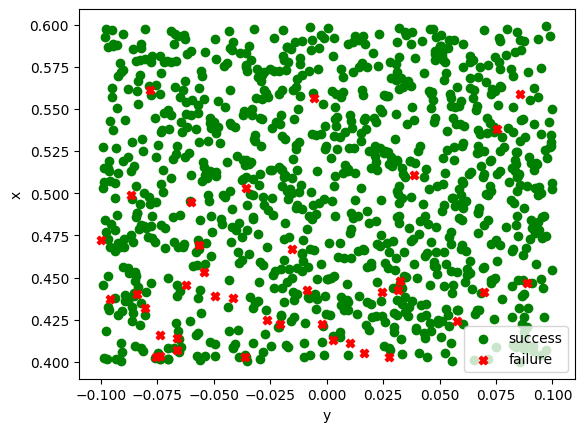

In [11]:
poss = [pos for pos in poses[:,:3]]
poss = np.stack(poss)

plt.scatter(poss[successes, 1], poss[successes, 0], color="tab:blue", label="success")
plt.scatter(poss[~successes, 1], poss[~successes, 0], color="tab:orange", marker="X", label="failure")
plt.legend()
plt.xlabel("y")
plt.ylabel("x")

Text(0.5, 0, 'yaw')

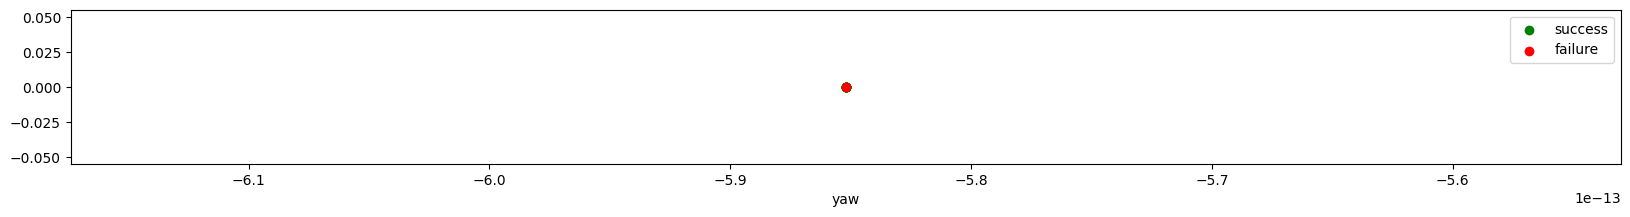

In [85]:
oris = [ori for ori in poses[:,3:]]
oris = np.stack(oris)

plt.figure(figsize=(20,2))
plt.scatter(oris[successes, 2], np.zeros_like(oris[successes, 0]), color="tab:blue", label="success")
plt.scatter(oris[~successes, 2], np.zeros_like(oris[~successes, 0]), color="tab:orange", label="failure")
plt.legend()
plt.xlabel("yaw")

In [86]:
# some of the outer angle randomizations fail

In [87]:
    # # modify data
    
    # dataset_path = "data/green_block/train"
    # key = "215122255213_rgb"
    
    # file_names = glob.glob(f"{dataset_path}/episode_*.npy")
    # assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"
    
    # for file in tqdm(file_names):
    #     data = np.load(file, allow_pickle=True)
    #     for i in range(len(data)):
    #         data[i][key] = data[i][key][:,160:]
    #         print(data[i][key].shape)
    #     np.save(file, data)